### 1. PreProcessing the worldDevelopmentIndicators1.csv

In [1]:
import pandas as pd

df = pd.read_csv('../data/worldDevelopmentIndicators1.csv')

##### Step 1: Melt to long format

In [4]:
id_vars = ["Country Name", "Country Code", "Series Name", "Series Code"]
year_columns = [col for col in df.columns if "[YR" in col]
df_melted = df.melt(id_vars=id_vars, value_vars=year_columns,
                    var_name="Year", value_name="Value")

##### Step 2: Extract numeric year


In [7]:
df_melted["Year"] = df_melted["Year"].str.extract(r"(\d{4})").astype(int)

# Step 3: Clean missing values and ensure float type
df_melted = df_melted[df_melted["Value"] != ".."]
df_melted["Value"] = pd.to_numeric(df_melted["Value"], errors="coerce")

# Step 4: Pivot into ML format (row = (country, year), column = indicator)
df_pivot = df_melted.pivot_table(
    index=["Country Name", "Country Code", "Year"],
    columns="Series Name",
    values="Value"
).reset_index()

# Step 5: Drop features (indicators) with >50% missing values
min_non_nan = len(df_pivot) * 0.5
df_pivot = df_pivot.dropna(thresh=min_non_nan, axis=1)

# Step 6: Sort and fill missing values within each country
df_pivot = df_pivot.sort_values(["Country Name", "Year"])
df_filled = df_pivot.groupby("Country Name").ffill().bfill()

In [9]:
# Final check: print shape and sample data
print(f"✅ Final shape: {df_filled.shape}")
print(df_filled.head())

✅ Final shape: (5300, 13)
Series Name Country Code  Year  Control of Corruption: Estimate  \
0                    AFG  2004                        -1.350647   
1                    AFG  2005                        -1.447252   
2                    AFG  2006                        -1.446292   
3                    AFG  2007                        -1.613251   
4                    AFG  2008                        -1.672096   

Series Name  GDP per capita growth (annual %)  \
0                                   -2.148212   
1                                    7.383377   
2                                    1.132485   
3                                   11.692303   
4                                    1.677279   

Series Name  Government Effectiveness: Estimate  \
0                                     -0.945146   
1                                     -1.228816   
2                                     -1.473652   
3                                     -1.440111   
4                    

In [11]:
df_filled.head()

Series Name,Country Code,Year,Control of Corruption: Estimate,GDP per capita growth (annual %),Government Effectiveness: Estimate,"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Political Stability and Absence of Violence/Terrorism: Estimate,"Population, female","Population, male","Population, total",Refugees under the mandate of the UNHCR by country or territory of origin,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,AFG,2004,-1.350647,-2.148212,-0.945146,12.686269,57.810,-2.295682,11709120.0,11851534.0,23560654.0,2414460.0,7.899
1,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,12284658.0,24404567.0,2166139.0,7.885
2,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,12805479.0,25424094.0,2107510.0,7.914
3,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,13056363.0,25909852.0,3057655.0,7.817
4,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,13350888.0,26482622.0,2833116.0,7.878


In [13]:
df_pivot.head()

Series Name,Country Name,Country Code,Year,Control of Corruption: Estimate,GDP per capita growth (annual %),Government Effectiveness: Estimate,"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Political Stability and Absence of Violence/Terrorism: Estimate,"Population, female","Population, male","Population, total",Refugees under the mandate of the UNHCR by country or territory of origin,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,NaN,57.810,-2.295682,11709120.0,11851534.0,23560654.0,2414460.0,7.899
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,12284658.0,24404567.0,2166139.0,7.885
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,12805479.0,25424094.0,2107510.0,7.914
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,13056363.0,25909852.0,3057655.0,7.817
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,13350888.0,26482622.0,2833116.0,7.878


#### Step 7 (Corrected): Forward-fill + Backward-fill by Country, preserving 'Country Name'

In [16]:
df_filled = (
    df_pivot
    .sort_values(["Country Name", "Year"])
    .groupby("Country Name", group_keys=False)
    .apply(lambda group: group.ffill().bfill())
)

C:\Users\pnish\AppData\Local\Temp\ipykernel_30264\3371947064.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.ffill().bfill())


In [18]:
df_filled.head()

Series Name,Country Name,Country Code,Year,Control of Corruption: Estimate,GDP per capita growth (annual %),Government Effectiveness: Estimate,"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Political Stability and Absence of Violence/Terrorism: Estimate,"Population, female","Population, male","Population, total",Refugees under the mandate of the UNHCR by country or territory of origin,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,12.686269,57.810,-2.295682,11709120.0,11851534.0,23560654.0,2414460.0,7.899
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,12284658.0,24404567.0,2166139.0,7.885
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,12805479.0,25424094.0,2107510.0,7.914
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,13056363.0,25909852.0,3057655.0,7.817
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,13350888.0,26482622.0,2833116.0,7.878


In [20]:
df_pivot.head()

Series Name,Country Name,Country Code,Year,Control of Corruption: Estimate,GDP per capita growth (annual %),Government Effectiveness: Estimate,"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Political Stability and Absence of Violence/Terrorism: Estimate,"Population, female","Population, male","Population, total",Refugees under the mandate of the UNHCR by country or territory of origin,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,NaN,57.810,-2.295682,11709120.0,11851534.0,23560654.0,2414460.0,7.899
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,12284658.0,24404567.0,2166139.0,7.885
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,12805479.0,25424094.0,2107510.0,7.914
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,13056363.0,25909852.0,3057655.0,7.817
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,13350888.0,26482622.0,2833116.0,7.878


In [22]:
print(df_pivot.shape)
print(df_filled.shape)

(5300, 14)
(5300, 14)


#### for better code redability, converted df_filled to df_wdi

In [140]:
df_wdi = df_filled
df_wdi.head()

Series Name,Country Name,Country Code,Year,Control of Corruption: Estimate,GDP per capita growth (annual %),Government Effectiveness: Estimate,"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Political Stability and Absence of Violence/Terrorism: Estimate,"Population, female","Population, male","Population, total",Refugees under the mandate of the UNHCR by country or territory of origin,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,12.686269,57.810,-2.295682,11709120.0,11851534.0,23560654.0,2414460.0,7.899
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,12284658.0,24404567.0,2166139.0,7.885
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,12805479.0,25424094.0,2107510.0,7.914
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,13056363.0,25909852.0,3057655.0,7.817
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,13350888.0,26482622.0,2833116.0,7.878


In [27]:
df_wdi.shape

(5300, 14)

#### 2. Preprocessing UCDP dataset

In [30]:
df_ucdp = pd.read_csv('../Data/organizedviolencecy_v25_1.csv')

In [32]:
print(df_ucdp.shape)
df_ucdp.head()

(6936, 74)


,country_id_cy,country_cy,year_cy,region_cy,main_govt_name_cy,sb_exist_cy,sb_dyad_count_cy,sb_dyad_ids_cy,sb_dyad_names_cy,sb_deaths_parties_cy,...,os_total_deaths_best_cy,os_total_deaths_high_cy,os_total_deaths_low_cy,cumulative_total_deaths_parties_in_orgvio_cy,cumulative_total_deaths_civilians_in_orgvio_cy,cumulative_total_deaths_unknown_in_orgvio_cy,cumulative_total_deaths_in_orgvio_best_cy,cumulative_total_deaths_in_orgvio_high_cy,cumulative_total_deaths_in_orgvio_low_cy,version
0,700,Afghanistan,1989,Asia,Government of Afghanistan,1,5,724; 726; 727; 729; 732,Government of Afghanistan - Hizb-i Islami-yi A...,1019,...,0,0,0,1065,303,4043,5411,17642,2141,25.1
1,700,Afghanistan,1990,Asia,Government of Afghanistan,1,5,724; 726; 727; 732; 733,Government of Afghanistan - Hizb-i Islami-yi A...,704,...,0,0,0,724,101,689,1514,2311,1359,25.1
2,700,Afghanistan,1991,Asia,Government of Afghanistan,1,4,724; 726; 727; 732,Government of Afghanistan - Hizb-i Islami-yi A...,2274,...,0,0,0,2274,49,1230,3553,4053,3407,25.1
3,700,Afghanistan,1992,Asia,Government of Afghanistan,1,4,724; 726; 727; 732,Government of Afghanistan - Hizb-i Islami-yi A...,187,...,8,304,8,187,1695,2503,4385,5865,4368,25.1
4,700,Afghanistan,1993,Asia,Government of Afghanistan,1,4,726; 732; 734; 842,Government of Afghanistan - Hizb-i Islami-yi A...,554,...,26,240,26,556,637,2912,4105,8433,4097,25.1


In [34]:
df_ucdp = df_ucdp[(df_ucdp["year_cy"] >= 2004) & (df_ucdp["year_cy"] <= 2023)]

In [36]:
print(df_ucdp.shape)
df_ucdp.head()

(3907, 74)


,country_id_cy,country_cy,year_cy,region_cy,main_govt_name_cy,sb_exist_cy,sb_dyad_count_cy,sb_dyad_ids_cy,sb_dyad_names_cy,sb_deaths_parties_cy,...,os_total_deaths_best_cy,os_total_deaths_high_cy,os_total_deaths_low_cy,cumulative_total_deaths_parties_in_orgvio_cy,cumulative_total_deaths_civilians_in_orgvio_cy,cumulative_total_deaths_unknown_in_orgvio_cy,cumulative_total_deaths_in_orgvio_best_cy,cumulative_total_deaths_in_orgvio_high_cy,cumulative_total_deaths_in_orgvio_low_cy,version
15,700,Afghanistan,2004,Asia,Government of Afghanistan,1,2,735; 878,Government of Afghanistan - Taleban; Governmen...,589,...,53,72,51,612,77,128,817,1439,773,25.1
16,700,Afghanistan,2005,Asia,Government of Afghanistan,1,2,735; 878,Government of Afghanistan - Taleban; Governmen...,1471,...,116,150,116,1471,200,40,1711,2109,1528,25.1
17,700,Afghanistan,2006,Asia,Government of Afghanistan,1,3,726; 735; 878,Government of Afghanistan - Hizb-i Islami-yi A...,4242,...,196,253,194,4243,477,262,4982,5853,4911,25.1
18,700,Afghanistan,2007,Asia,Government of Afghanistan,1,3,12291; 735; 878,Government of Afghanistan - Government of Paki...,6193,...,113,142,113,6193,674,170,7037,8601,6480,25.1
19,700,Afghanistan,2008,Asia,Government of Afghanistan,1,4,12291; 726; 735; 878,Government of Afghanistan - Government of Paki...,4576,...,108,120,74,4576,763,322,5661,7194,5185,25.1


In [38]:
# Step 3: Drop Duplicates and Unused Columns (Optional)
df_ucdp = df_ucdp[[
    "country_cy", "year_cy", 
    "sb_exist_cy", "ns_exist_cy", "os_exist_cy"
]].drop_duplicates()

In [40]:
print(df_ucdp.shape)
df_ucdp.head()

(3907, 5)


,country_cy,year_cy,sb_exist_cy,ns_exist_cy,os_exist_cy
15,Afghanistan,2004,1,1,1
16,Afghanistan,2005,1,0,1
17,Afghanistan,2006,1,1,1
18,Afghanistan,2007,1,1,1
19,Afghanistan,2008,1,0,1


### Creating a target variable

In [43]:
df_ucdp["organized_violence_occurred"] = (
    (df_ucdp["sb_exist_cy"] == 1) |
    (df_ucdp["ns_exist_cy"] == 1) |
    (df_ucdp["os_exist_cy"] == 1) 
).astype(int)

In [116]:
print(df_ucdp.shape)
df_ucdp.head()

(3907, 6)


,Country Name,Year,sb_exist_cy,ns_exist_cy,os_exist_cy,organized_violence_occurred
15,Afghanistan,2004,1,1,1,1
16,Afghanistan,2005,1,0,1,1
17,Afghanistan,2006,1,1,1,1
18,Afghanistan,2007,1,1,1,1
19,Afghanistan,2008,1,0,1,1


In [172]:
df_ucdp[df_ucdp["Country Name"] == "France"]

,Country Name,Year,sb_exist_cy,ns_exist_cy,os_exist_cy,organized_violence_occurred
2144,France,2004,0,0,0,0
2145,France,2005,0,0,0,0
2146,France,2006,0,0,0,0
2147,France,2007,1,0,0,1
2148,France,2008,0,0,0,0
2149,France,2009,0,0,0,0
2150,France,2010,0,0,0,0
2151,France,2011,0,0,0,0
2152,France,2012,0,0,1,1
2153,France,2013,0,0,0,0


In [49]:
df_ucdp['organized_violence_occurred'].value_counts()

organized_violence_occurred
0    2797
1    1110
Name: count, dtype: int64

In [51]:
df_ucdp['sb_exist_cy'].value_counts()

sb_exist_cy
0    3096
1     811
Name: count, dtype: int64

In [53]:
df_ucdp['ns_exist_cy'].value_counts()

ns_exist_cy
0    3436
1     471
Name: count, dtype: int64

In [55]:
df_ucdp['os_exist_cy'].value_counts()

os_exist_cy
0    3078
1     829
Name: count, dtype: int64

#### 3. Merging two datasets/dataframes

In [58]:
df_ucdp.rename(columns={
    "country_cy": "Country Name",
    "year_cy": "Year"
}, inplace=True)

In [60]:
print(df_wdi.columns)
print(df_ucdp.columns)

Index(['Country Name', 'Country Code', 'Year',
       'Control of Corruption: Estimate', 'GDP per capita growth (annual %)',
       'Government Effectiveness: Estimate',
       'Inflation, consumer prices (annual %)',
       'Life expectancy at birth, total (years)',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Population, female', 'Population, male', 'Population, total',
       'Refugees under the mandate of the UNHCR by country or territory of origin',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
      dtype='object', name='Series Name')
Index(['Country Name', 'Year', 'sb_exist_cy', 'ns_exist_cy', 'os_exist_cy',
       'organized_violence_occurred'],
      dtype='object')


In [62]:
df_merged = pd.merge(
    df_wdi,
    df_ucdp,
    how="inner",
    on=["Country Name", "Year"]
)

In [64]:
print("Merged shape:", df_merged.shape)
print(df_merged[["Country Name", "Year"]].duplicated().sum(), "duplicate (Country, Year) pairs")
print("Nulls per column:\n", df_merged.isna().sum().sort_values(ascending=False))

Merged shape: (3147, 18)
0 duplicate (Country, Year) pairs
Nulls per column:
 Unemployment, total (% of total labor force) (modeled ILO estimate)          256
Inflation, consumer prices (annual %)                                        180
Refugees under the mandate of the UNHCR by country or territory of origin     16
Country Name                                                                   0
Population, male                                                               0
os_exist_cy                                                                    0
ns_exist_cy                                                                    0
sb_exist_cy                                                                    0
Population, total                                                              0
Population, female                                                             0
Country Code                                                                   0
Political Stability and Absence

In [66]:
df_merged.head()

,Country Name,Country Code,Year,Control of Corruption: Estimate,GDP per capita growth (annual %),Government Effectiveness: Estimate,"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Political Stability and Absence of Violence/Terrorism: Estimate,"Population, female","Population, male","Population, total",Refugees under the mandate of the UNHCR by country or territory of origin,"Unemployment, total (% of total labor force) (modeled ILO estimate)",sb_exist_cy,ns_exist_cy,os_exist_cy,organized_violence_occurred
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,12.686269,57.810,-2.295682,11709120.0,11851534.0,23560654.0,2414460.0,7.899,1,1,1,1
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,12284658.0,24404567.0,2166139.0,7.885,1,0,1,1
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,12805479.0,25424094.0,2107510.0,7.914,1,1,1,1
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,13056363.0,25909852.0,3057655.0,7.817,1,1,1,1
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,13350888.0,26482622.0,2833116.0,7.878,1,0,1,1


##### We only have 3 feature columns with missing values:

In [69]:
df_merged_sorted = df_merged.sort_values(by=["Country Name", "Year"])

df_cleaned = df_merged_sorted.groupby("Country Name", group_keys=False)\
    .apply(lambda group: group.ffill().bfill())

C:\Users\pnish\AppData\Local\Temp\ipykernel_30264\3583171466.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.ffill().bfill())


In [71]:
print("Nulls after cleaning:\n", df_cleaned.isna().sum().sort_values(ascending=False))

Nulls after cleaning:
 Unemployment, total (% of total labor force) (modeled ILO estimate)          256
Inflation, consumer prices (annual %)                                        180
Refugees under the mandate of the UNHCR by country or territory of origin     16
Country Name                                                                   0
Population, male                                                               0
os_exist_cy                                                                    0
ns_exist_cy                                                                    0
sb_exist_cy                                                                    0
Population, total                                                              0
Population, female                                                             0
Country Code                                                                   0
Political Stability and Absence of Violence/Terrorism: Estimate                0
Life 

In [73]:
#fill with column-wise median as a simple and consistent imputation step.
df_cleaned["Unemployment, total (% of total labor force) (modeled ILO estimate)"] = \
    df_cleaned["Unemployment, total (% of total labor force) (modeled ILO estimate)"].fillna(
        df_cleaned["Unemployment, total (% of total labor force) (modeled ILO estimate)"].median()
    )

df_cleaned["Inflation, consumer prices (annual %)"] = \
    df_cleaned["Inflation, consumer prices (annual %)"].fillna(
        df_cleaned["Inflation, consumer prices (annual %)"].median()
    )

df_cleaned["Refugees under the mandate of the UNHCR by country or territory of origin"] = \
    df_cleaned["Refugees under the mandate of the UNHCR by country or territory of origin"].fillna(
        df_cleaned["Refugees under the mandate of the UNHCR by country or territory of origin"].median()
    )

In [75]:
df_cleaned.isna().sum().sum()

0

In [77]:
df_cleaned.head()

,Country Name,Country Code,Year,Control of Corruption: Estimate,GDP per capita growth (annual %),Government Effectiveness: Estimate,"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Political Stability and Absence of Violence/Terrorism: Estimate,"Population, female","Population, male","Population, total",Refugees under the mandate of the UNHCR by country or territory of origin,"Unemployment, total (% of total labor force) (modeled ILO estimate)",sb_exist_cy,ns_exist_cy,os_exist_cy,organized_violence_occurred
0,Afghanistan,AFG,2004,-1.350647,-2.148212,-0.945146,12.686269,57.810,-2.295682,11709120.0,11851534.0,23560654.0,2414460.0,7.899,1,1,1,1
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,12284658.0,24404567.0,2166139.0,7.885,1,0,1,1
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,12805479.0,25424094.0,2107510.0,7.914,1,1,1,1
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,13056363.0,25909852.0,3057655.0,7.817,1,1,1,1
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,13350888.0,26482622.0,2833116.0,7.878,1,0,1,1


### 4. Feature Enginnering 

In [80]:
df_fe = df_cleaned.sort_values(by=["Country Name", "Year"]).copy()

In [82]:
id_cols = ["Country Name", "Country Code", "Year", "organized_violence_occurred"]
feature_cols = [col for col in df_fe.columns if col not in id_cols]

##### Create Lag, Delta, and Rolling Mean Features

In [85]:
for col in feature_cols:
    df_fe[f"{col}_lag1"] = df_fe.groupby("Country Name")[col].shift(1)
    df_fe[f"{col}_delta"] = df_fe[col] - df_fe[f"{col}_lag1"]
    df_fe[f"{col}_rollmean3"] = df_fe.groupby("Country Name")[col].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)

In [87]:
#Lag and delta features are NaN in the first year for each country — therefore dropingp those rows:
df_fe = df_fe[df_fe.groupby("Country Name")["Year"].transform("min") != df_fe["Year"]]

In [89]:
#verify
print(df_fe.shape)
df_fe.sample(3).T

(2989, 60)


,766,131,262
Country Name,Dominica,Armenia,Belarus
Country Code,DMA,ARM,BLR
Year,2010,2015,2006
Control of Corruption: Estimate,0.771072,-0.609747,-0.529869
GDP per capita growth (annual %),0.679944,3.515995,10.675587
Government Effectiveness: Estimate,0.680927,-0.33179,-1.203701
"Inflation, consumer prices (annual %)",2.999366,3.731691,6.997129
"Life expectancy at birth, total (years)",71.68,74.870732,69.404878
Political Stability and Absence of Violence/Terrorism: Estimate,0.903118,-0.256799,0.14847
"Population, female",34434.0,1622381.0,5131704.0


In [91]:
df_fe.head()

,Country Name,Country Code,Year,Control of Corruption: Estimate,GDP per capita growth (annual %),Government Effectiveness: Estimate,"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Political Stability and Absence of Violence/Terrorism: Estimate,"Population, female",...,"Unemployment, total (% of total labor force) (modeled ILO estimate)_rollmean3",sb_exist_cy_lag1,sb_exist_cy_delta,sb_exist_cy_rollmean3,ns_exist_cy_lag1,ns_exist_cy_delta,ns_exist_cy_rollmean3,os_exist_cy_lag1,os_exist_cy_delta,os_exist_cy_rollmean3
1,Afghanistan,AFG,2005,-1.447252,7.383377,-1.228816,12.686269,58.247,-2.067510,12119909.0,...,7.892000,1.0,0.0,1.0,1.0,-1.0,0.500000,1.0,0.0,1.0
2,Afghanistan,AFG,2006,-1.446292,1.132485,-1.473652,6.784597,58.553,-2.219135,12618615.0,...,7.899333,1.0,0.0,1.0,0.0,1.0,0.666667,1.0,0.0,1.0
3,Afghanistan,AFG,2007,-1.613251,11.692303,-1.440111,8.680571,58.956,-2.413373,12853489.0,...,7.872000,1.0,0.0,1.0,1.0,0.0,0.666667,1.0,0.0,1.0
4,Afghanistan,AFG,2008,-1.672096,1.677279,-1.527795,26.418664,59.708,-2.691361,13131734.0,...,7.869667,1.0,0.0,1.0,1.0,-1.0,0.666667,1.0,0.0,1.0
5,Afghanistan,AFG,2009,-1.552299,17.043896,-1.507752,-6.811161,60.248,-2.711421,13612943.0,...,7.816333,1.0,0.0,1.0,0.0,0.0,0.333333,1.0,0.0,1.0


### 5. EDA

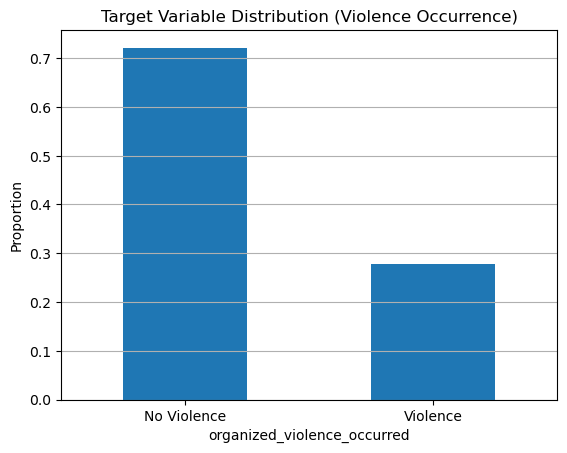

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count target variable
df_fe['organized_violence_occurred'].value_counts(normalize=True).plot(kind='bar')
plt.title('Target Variable Distribution (Violence Occurrence)')
plt.xticks([0, 1], ['No Violence', 'Violence'], rotation=0)
plt.ylabel('Proportion')
plt.grid(axis='y')
plt.show()

In [95]:
df_fe['organized_violence_occurred'].value_counts()

organized_violence_occurred
0    2157
1     832
Name: count, dtype: int64

In [96]:
df_fe[df_fe["Country Name"] == "India"]

,Country Name,Country Code,Year,Control of Corruption: Estimate,GDP per capita growth (annual %),Government Effectiveness: Estimate,"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Political Stability and Absence of Violence/Terrorism: Estimate,"Population, female",...,"Unemployment, total (% of total labor force) (modeled ILO estimate)_rollmean3",sb_exist_cy_lag1,sb_exist_cy_delta,sb_exist_cy_rollmean3,ns_exist_cy_lag1,ns_exist_cy_delta,ns_exist_cy_rollmean3,os_exist_cy_lag1,os_exist_cy_delta,os_exist_cy_rollmean3
1261,India,IND,2005,-0.363161,6.177029,-0.098775,4.246344,64.939,-1.013880,557250128.0,...,7.588500,1.0,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,1.0
1262,India,IND,2006,-0.274563,6.383677,-0.095376,5.796523,65.373,-1.065184,566062902.0,...,7.576333,1.0,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,1.0
1263,India,IND,2007,-0.397690,6.051600,0.136992,6.372881,65.803,-1.154296,574698451.0,...,7.555000,1.0,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,1.0
1264,India,IND,2008,-0.339098,1.614135,-0.009733,8.349267,66.247,-1.109707,583079198.0,...,7.589667,1.0,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,1.0
1265,India,IND,2009,-0.452406,6.313410,-0.003296,10.882353,66.700,-1.355548,591637549.0,...,7.627000,1.0,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,1.0
1266,India,IND,2010,-0.463755,6.930798,0.031656,11.989390,67.162,-1.277984,600383478.0,...,7.657333,1.0,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,1.0
1267,India,IND,2011,-0.540836,3.760742,0.022554,8.911793,67.623,-1.326795,609034769.0,...,7.644000,1.0,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,1.0
1268,India,IND,2012,-0.513968,4.017267,-0.156087,9.478997,68.076,-1.289310,617557834.0,...,7.644667,1.0,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,1.0
1269,India,IND,2013,-0.517281,4.977700,-0.157355,10.017878,68.499,-1.229174,625952834.0,...,7.664333,1.0,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,1.0
1270,India,IND,2014,-0.457606,6.063981,-0.222847,6.665657,68.932,-0.997912,634011081.0,...,7.683667,1.0,0.0,1.0,1.0,0.0,1.000000,1.0,0.0,1.0


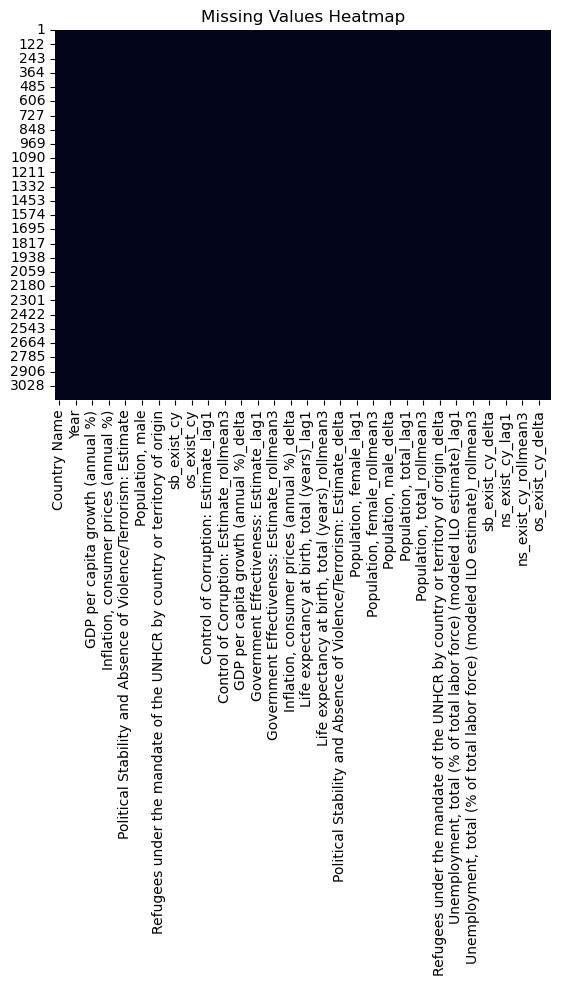

In [97]:
sns.heatmap(df_fe.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

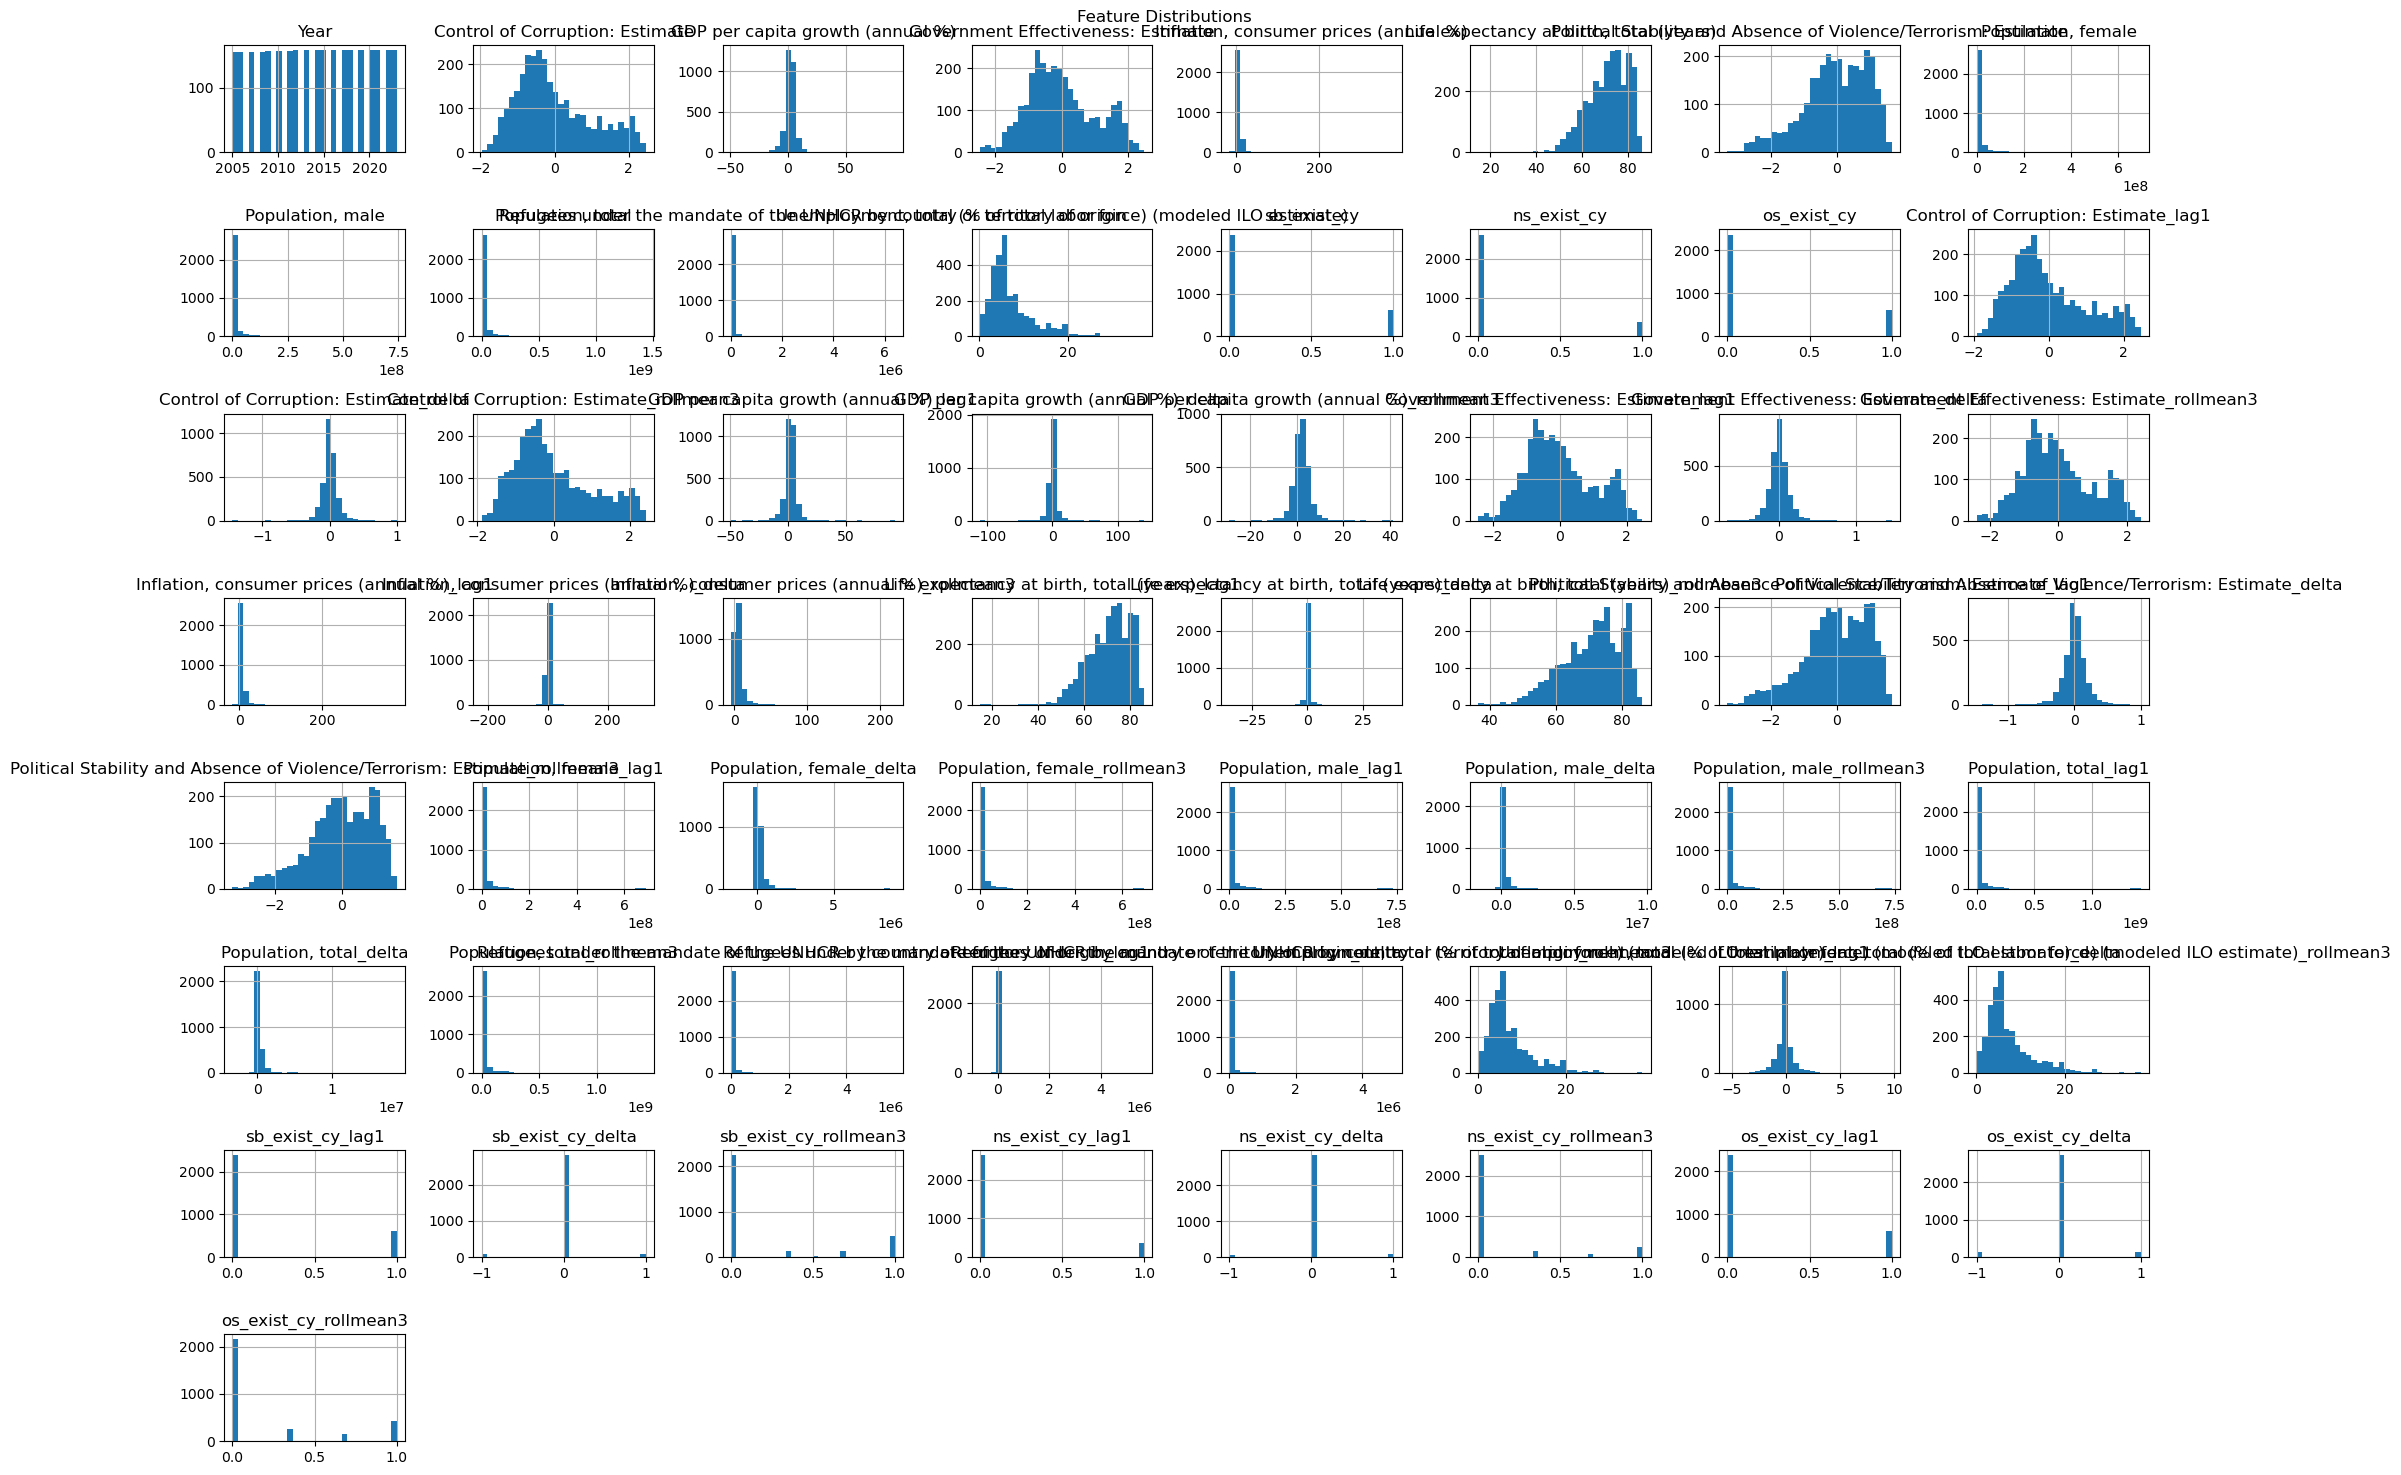

In [98]:
numeric_cols = df_fe.select_dtypes(include='number').drop(columns=['organized_violence_occurred']).columns

df_fe[numeric_cols].hist(figsize=(20, 15), bins=30)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

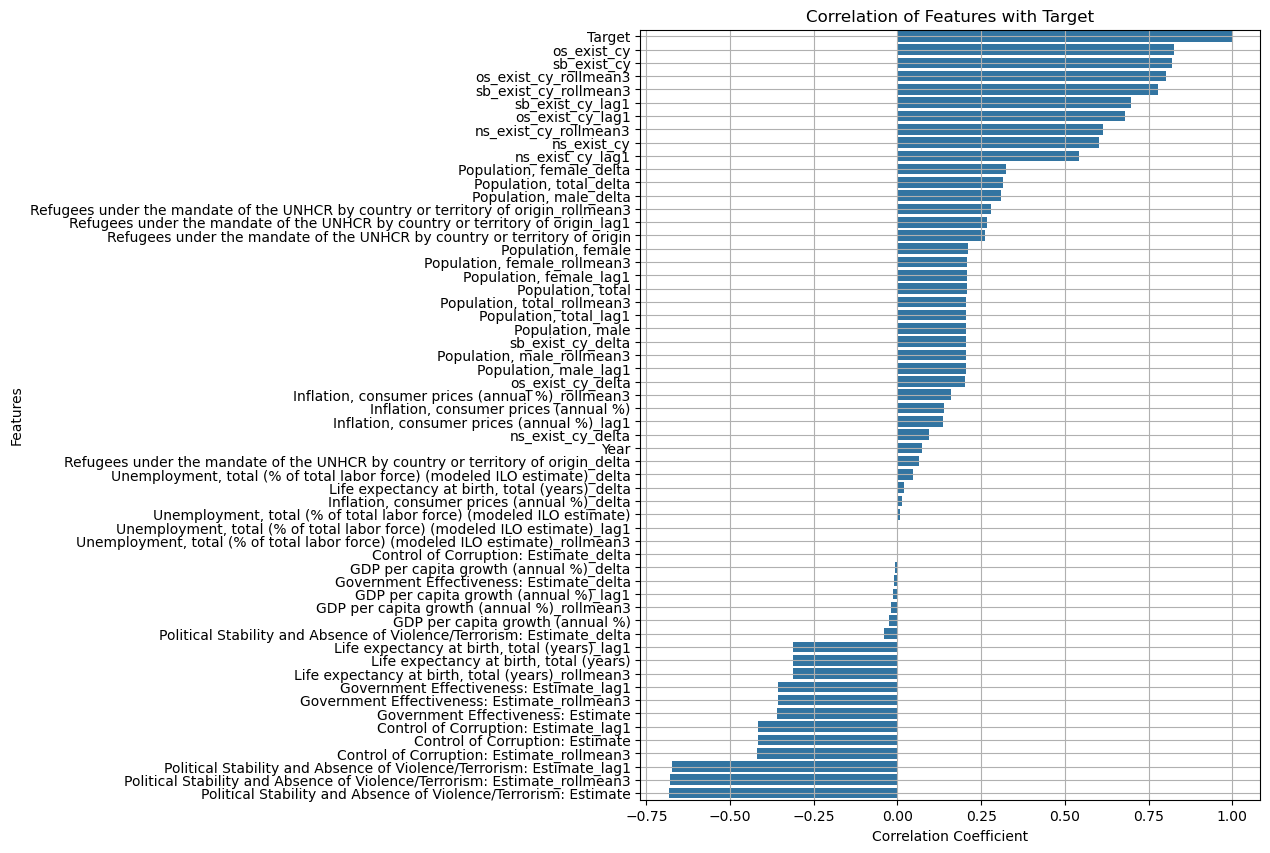

In [99]:
corrs = df_fe[numeric_cols].copy()
corrs['Target'] = df_fe['organized_violence_occurred']
correlation = corrs.corr()['Target'].sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(y=correlation.index, x=correlation.values)
plt.title("Correlation of Features with Target")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True)
plt.show()


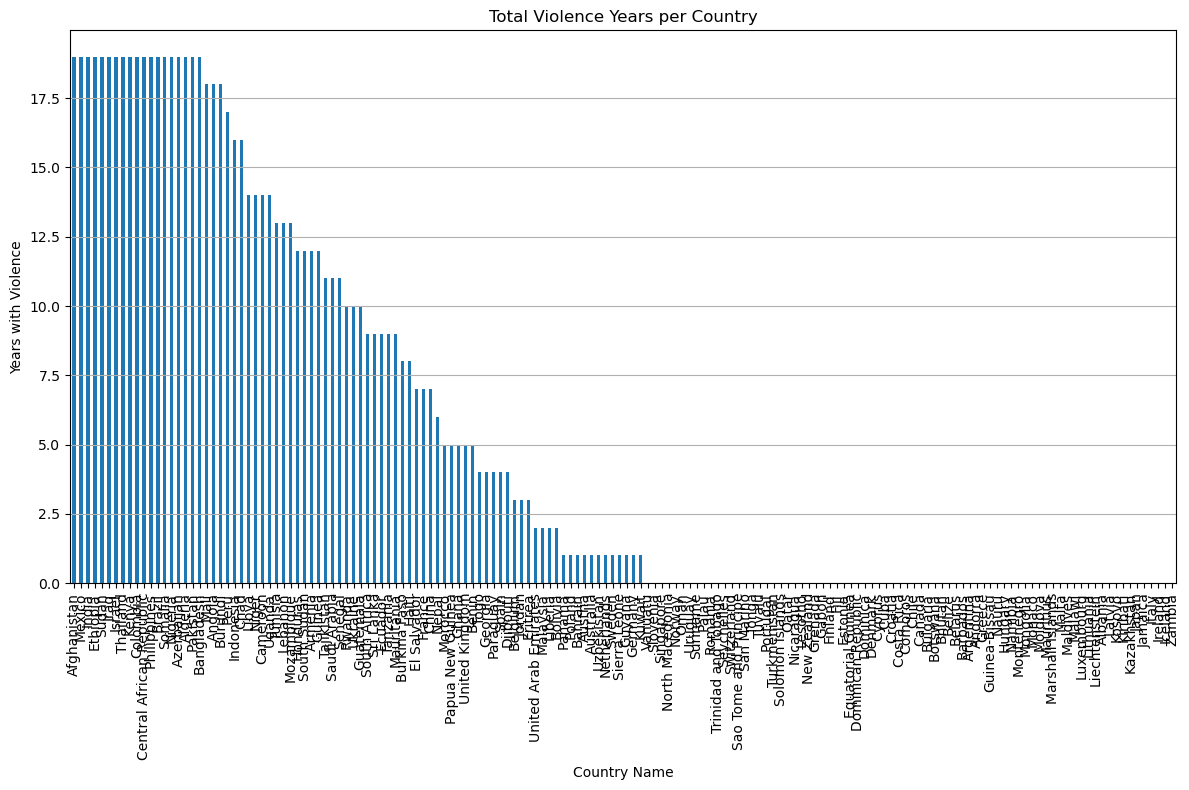

In [144]:
violence_by_country = df_fe.groupby("Country Name")['organized_violence_occurred'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
violence_by_country.plot(kind='bar')
plt.title("Total Violence Years per Country")
plt.ylabel("Years with Violence")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

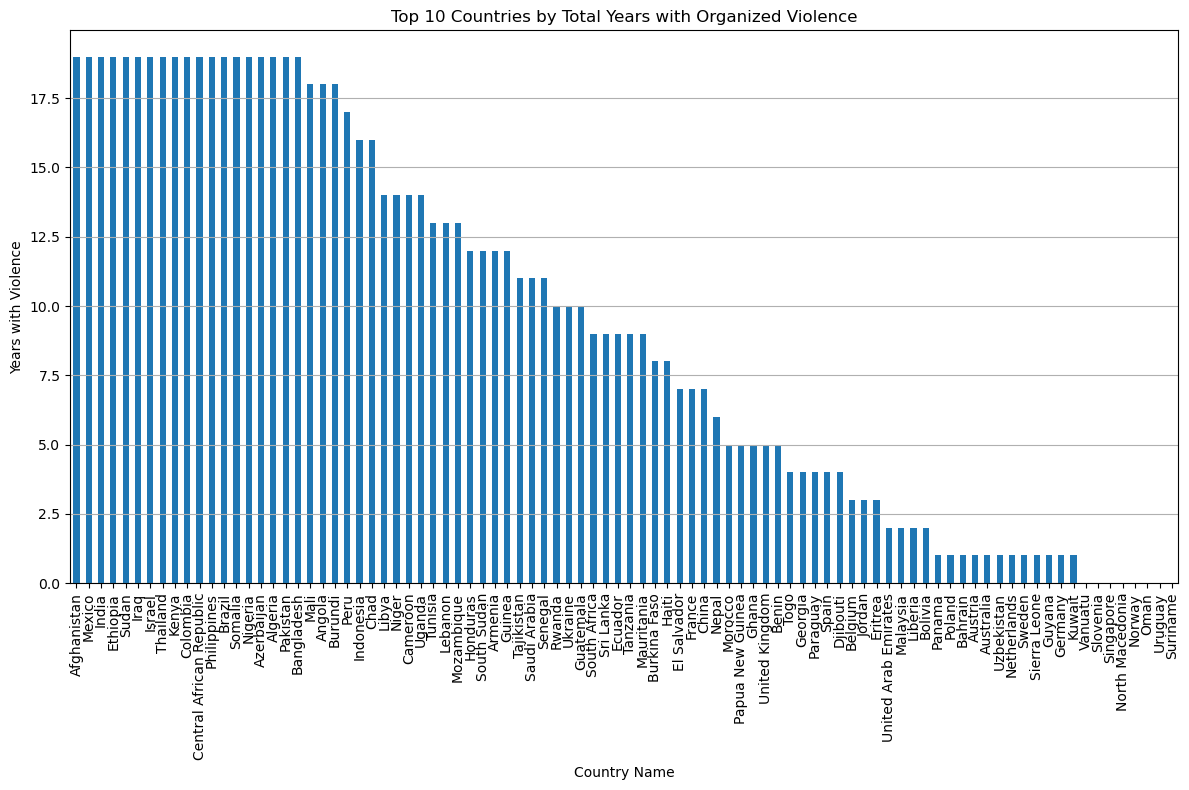

In [160]:
top_10_violence = violence_by_country.head(90)
plt.figure(figsize=(12, 8))
top_10_violence.plot(kind='bar')
plt.title("Top 10 Countries by Total Years with Organized Violence")
plt.ylabel("Years with Violence")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

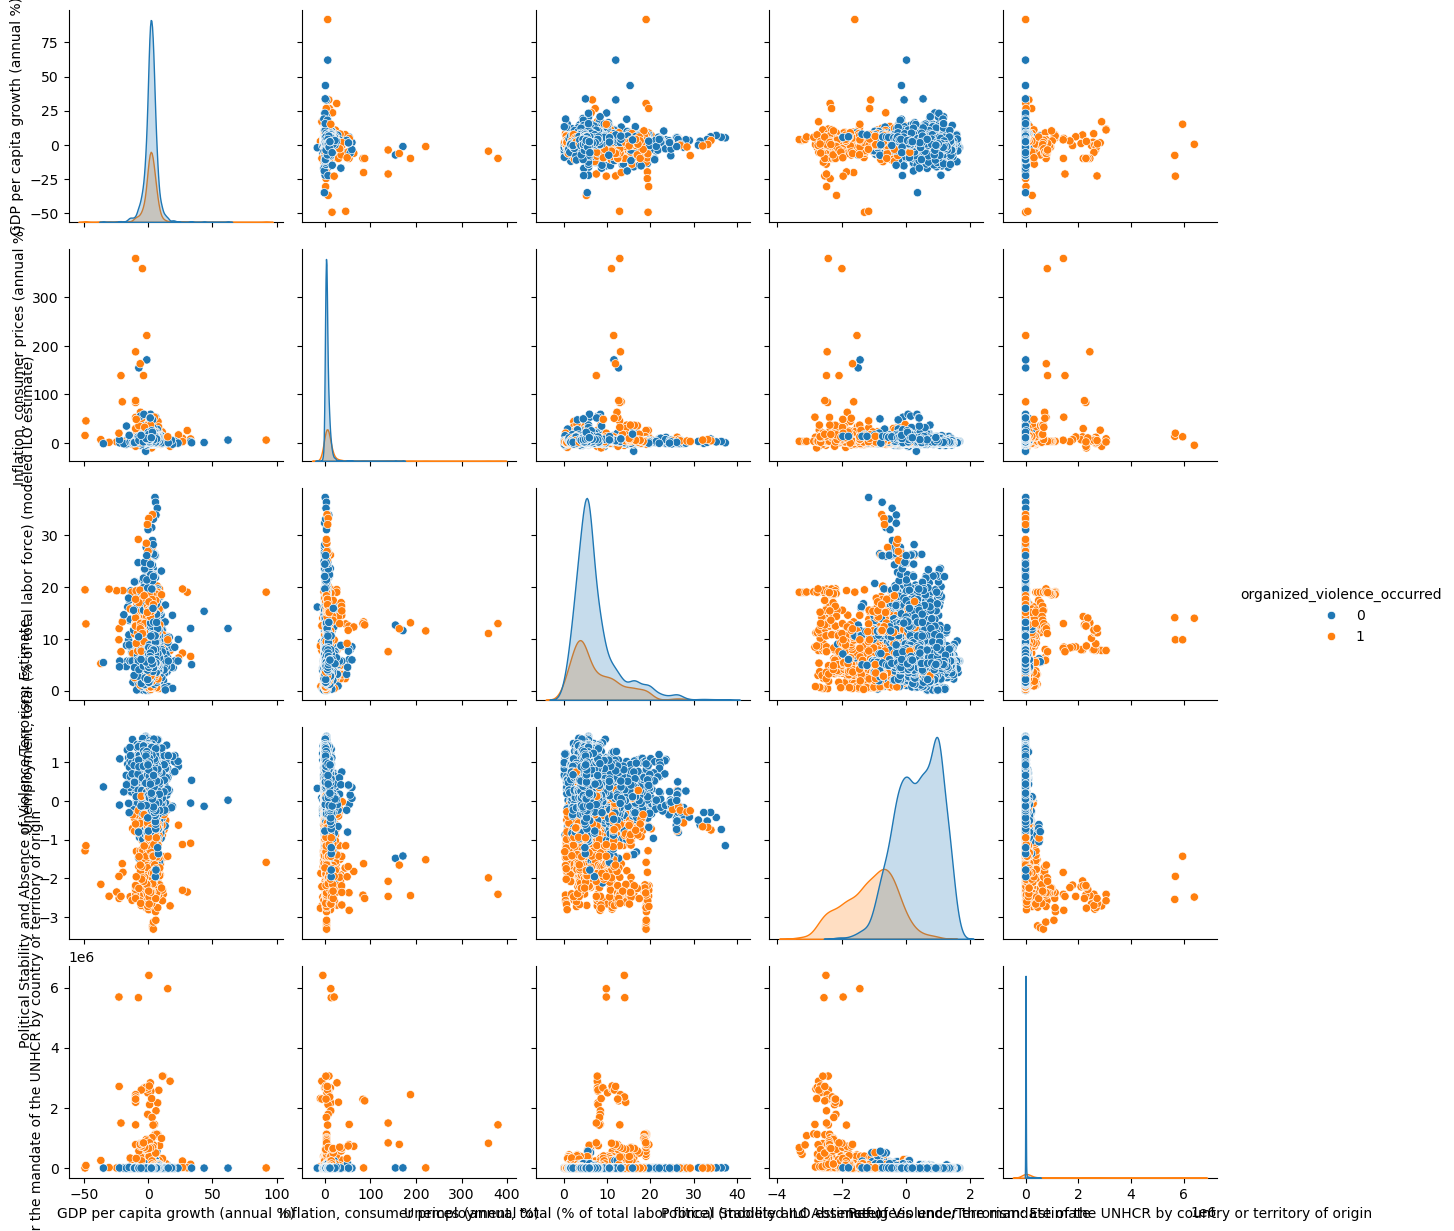

In [174]:
# Pairwise Plots (Optional for Key Features)
important_features = [
    "GDP per capita growth (annual %)",
    "Inflation, consumer prices (annual %)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Political Stability and Absence of Violence/Terrorism: Estimate",
    "Refugees under the mandate of the UNHCR by country or territory of origin"
]

sns.pairplot(df_fe[important_features + ['organized_violence_occurred']], hue='organized_violence_occurred')


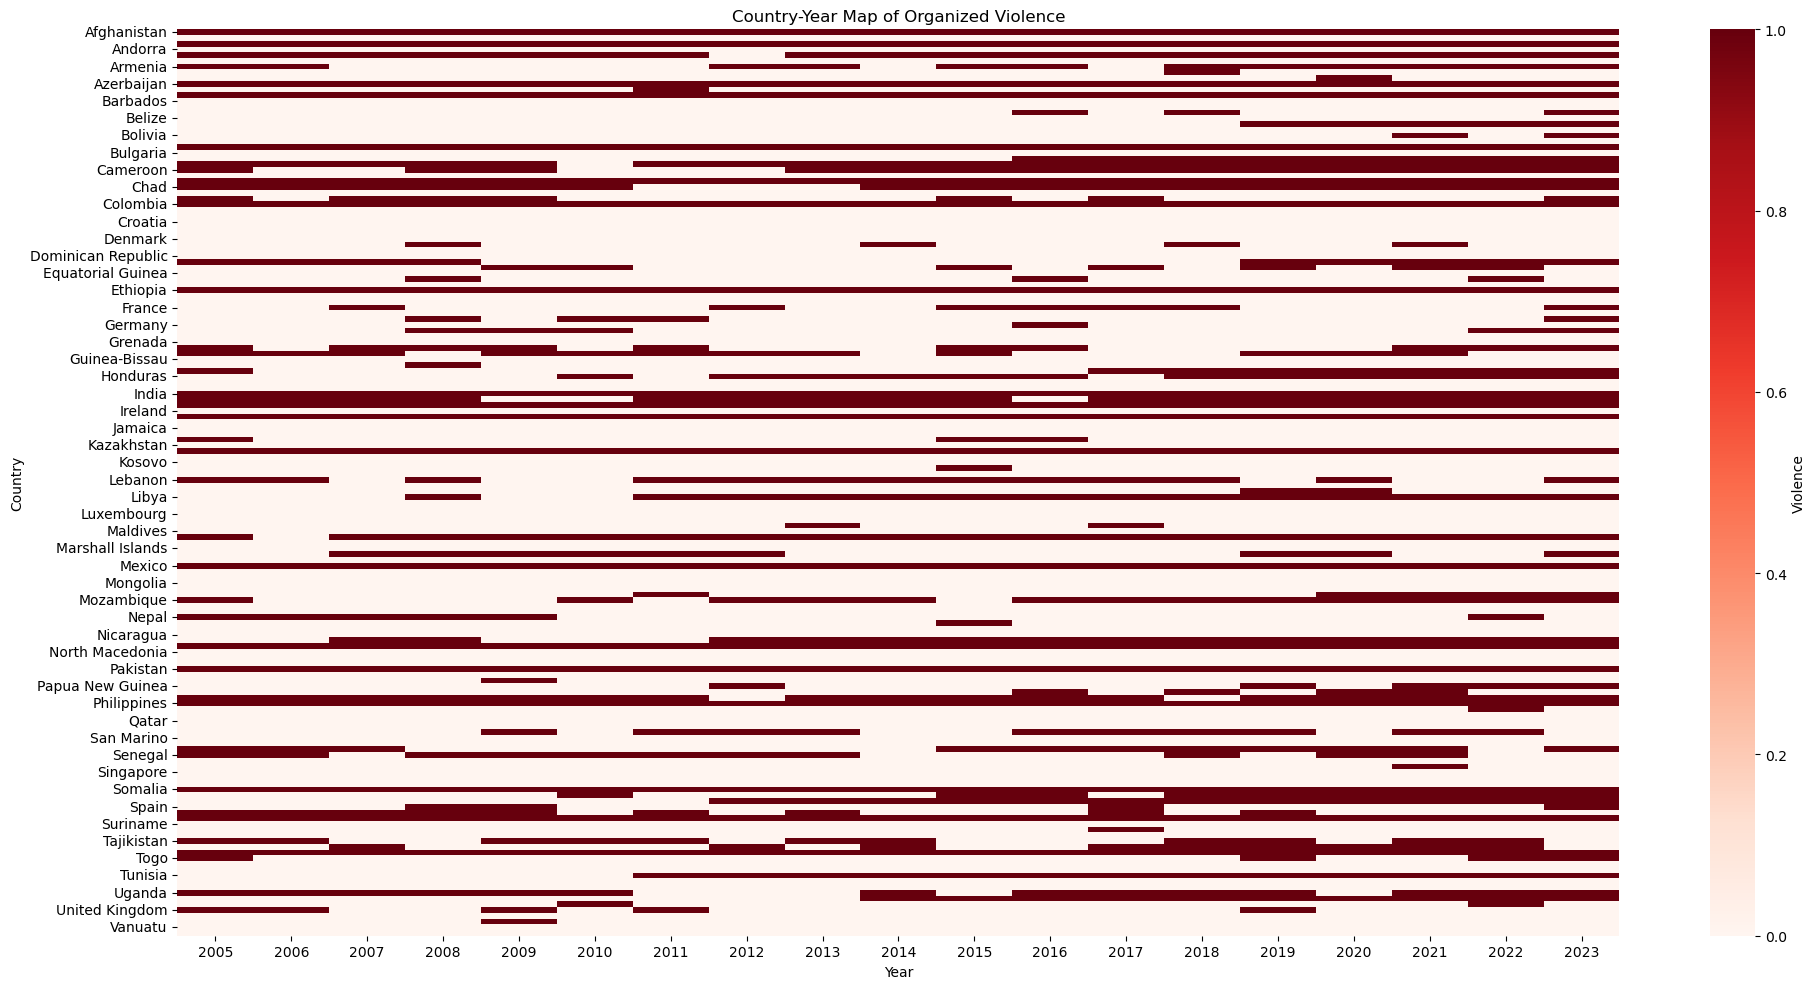

In [176]:
#country time heatmap
violence_map = df_fe.pivot_table(index='Country Name', columns='Year', values='organized_violence_occurred', fill_value=0)

plt.figure(figsize=(20, 10))
sns.heatmap(violence_map, cmap="Reds", cbar_kws={'label': 'Violence'})
plt.title("Country-Year Map of Organized Violence")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


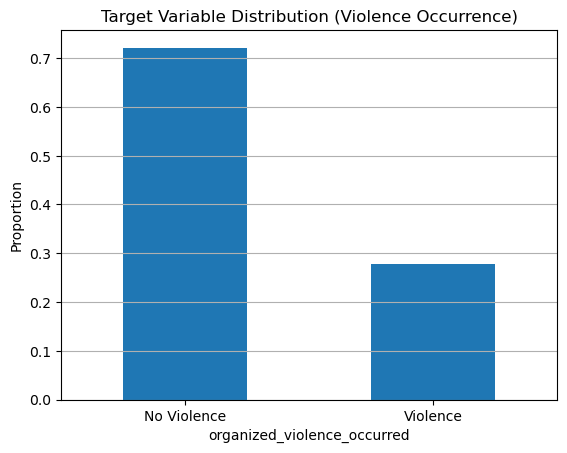

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count target variable
df_fe['organized_violence_occurred'].value_counts(normalize=True).plot(kind='bar')
plt.title('Target Variable Distribution (Violence Occurrence)')
plt.xticks([0, 1], ['No Violence', 'Violence'], rotation=0)
plt.ylabel('Proportion')
plt.grid(axis='y')
plt.show()

#### The above diagram tells us that our data has mild-to-moderate class imbalance. Accuracy is misleading; A model that always predicts “No Violence” will still be ~72% accurate. Not helpful. but tree based model will handle this immbalance so we will first go with random forest. We will u\se class_weight='balanced' in RandomForestClassifier

### Step 1: Prepare the Data

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Define Features and Target

In [186]:
# Drop non-feature columns
X = df_fe.drop(columns=[
    'Country Name', 'Country Code', 'Year', 'organized_violence_occurred'
])

# Target variable
y = df_fe['organized_violence_occurred']

### Step 3: Train-Test Split with Stratification

In [189]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Step 4: Train Random Forest with Class Weighting

In [193]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'  # handle class imbalance
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

### Step 5: Evaluate the Model

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       432
           1     1.0000    1.0000    1.0000       166

    accuracy                         1.0000       598
   macro avg     1.0000    1.0000    1.0000       598
weighted avg     1.0000    1.0000    1.0000       598



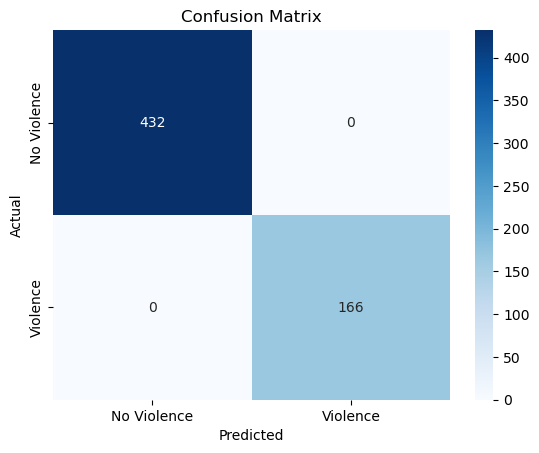

ROC AUC Score: 1.0000


In [196]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # for ROC and threshold tuning

# Classification metrics
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Violence", "Violence"], yticklabels=["No Violence", "Violence"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# AUC Score
roc_score = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_score:.4f}")

### Precision-Recall Curve 

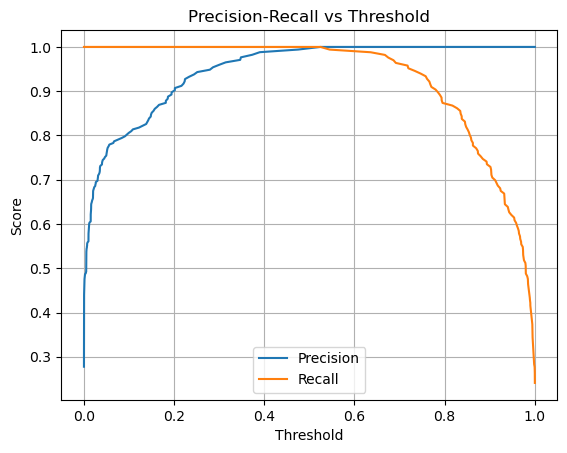

In [199]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()
